# Importing all the necessary libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Loading the dataset

In [26]:
License_Data = pd.read_csv("E:/Machine Learning/Drivers License Data.csv")

In [27]:
print(License_Data)

    Applicant ID  Gender    Age Group   Race  Training  Signals  Yield  \
0        AID0001    Male  Young Adult  Other       NaN    38.48  30.29   
1        AID0002  Female  Young Adult  Black       NaN    51.76  19.13   
2        AID0003    Male   Middle Age  Black       NaN    30.21  48.13   
3        AID0004    Male  Young Adult  Other       NaN    34.75  47.28   
4        AID0005    Male     Teenager  Other  Advanced    78.52  83.93   
..           ...     ...          ...    ...       ...      ...    ...   
495      AID0496    Male   Middle Age  Other     Basic    49.10  54.83   
496      AID0497    Male  Young Adult  White     Basic    50.68  42.22   
497      AID0498  Female  Young Adult  Black       NaN    33.43  70.27   
498      AID0499    Male   Middle Age  Black     Basic    50.07  51.41   
499      AID0500  Female  Young Adult  Black     Basic    47.38  67.98   

     Speed Control  Night Drive  Road Signs  Steer Control  Mirror Usage  \
0            37.03        33.53    

In [28]:
print(License_Data.head())

  Applicant ID  Gender    Age Group   Race  Training  Signals  Yield  \
0      AID0001    Male  Young Adult  Other       NaN    38.48  30.29   
1      AID0002  Female  Young Adult  Black       NaN    51.76  19.13   
2      AID0003    Male   Middle Age  Black       NaN    30.21  48.13   
3      AID0004    Male  Young Adult  Other       NaN    34.75  47.28   
4      AID0005    Male     Teenager  Other  Advanced    78.52  83.93   

   Speed Control  Night Drive  Road Signs  Steer Control  Mirror Usage  \
0          37.03        33.53       39.61          58.16         53.42   
1          63.05        34.87       19.56          16.48         27.97   
2          43.13        42.43       60.93          20.74         28.86   
3          50.49        42.10       22.52          33.87         48.52   
4          59.79        52.68       67.47          89.24         30.31   

   Confidence  Parking  Theory Test Reactions Qualified  
0       35.32    38.19        70.68   Average        No  
1     

In [29]:
X = License_Data.drop(['Qualified', 'Applicant ID'], axis=1)
Y = License_Data['Qualified']

# Exploratory Data Analysis

In [30]:
print(License_Data.shape)

(500, 17)


In [31]:
print(License_Data.isnull().sum())

Applicant ID       0
Gender             0
Age Group          0
Race               0
Training         150
Signals            0
Yield              0
Speed Control      0
Night Drive        0
Road Signs         0
Steer Control      0
Mirror Usage       0
Confidence         0
Parking            0
Theory Test        0
Reactions          0
Qualified          0
dtype: int64


In [32]:
Qualified = LabelEncoder()
Y = Qualified.fit_transform(Y)

In [33]:
categorical_features = ['Gender', 'Age Group', 'Race', 'Training', 'Reactions']
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [35]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Splitting, training and testing data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y) #Splitting the data into training and testing dataset
model.fit(X_train, y_train) #Train the model
y_pred = model.predict(X_test)

# Evaluation of Model

In [37]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Not Qualified', 'Qualified'])

print("Model Accuracy:")
print(accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy:
0.84

Confusion Matrix:
[[42  8]
 [ 8 42]]

Classification Report:
               precision    recall  f1-score   support

Not Qualified       0.84      0.84      0.84        50
    Qualified       0.84      0.84      0.84        50

     accuracy                           0.84       100
    macro avg       0.84      0.84      0.84       100
 weighted avg       0.84      0.84      0.84       100



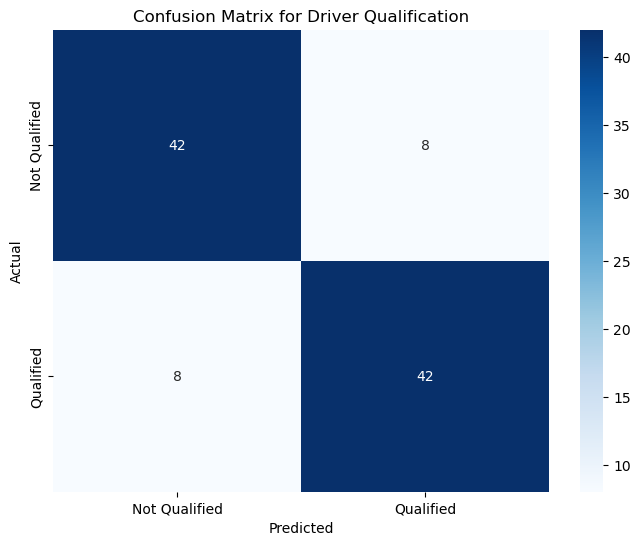

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Qualified', 'Qualified'],
            yticklabels=['Not Qualified', 'Qualified'])
plt.title('Confusion Matrix for Driver Qualification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()